Лабораторна робота № 7
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Тепер давайте імпортуємо датасет з інформацією про захворювання на Covid.

In [39]:
def getDataset():
    data = pd.read_csv('covidInfo.csv',index_col=['date'],parse_dates=['date'])
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    186899 non-null  object 
 1   continent                                   176020 non-null  object 
 2   location                                    186899 non-null  object 
 3   total_cases                                 179484 non-null  float64
 4   new_cases                                   179199 non-null  float64
 5   new_cases_smoothed                          178027 non-null  float64
 6   total_deaths                                161131 non-null  float64
 7   new_deaths                                  161104 non-null  float64
 8   new_deaths_smoothed                         159949 non-null  float64
 9   total_cases_per_million                     178655 non

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-29,AFG,Asia,Afghanistan,5.0,0.0,0.714,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-01,AFG,Asia,Afghanistan,5.0,0.0,0.714,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-02,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-03,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Тепер давайте залишимо саме потрібні нам дані.

In [40]:
dataset = dataset[['location','new_cases']]
dataset.info()
dataset.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   location   186899 non-null  object 
 1   new_cases  179199 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


,location,new_cases
date,,
2022-05-06,Zimbabwe,164.0
2022-05-07,Zimbabwe,0.0
2022-05-08,Zimbabwe,138.0
2022-05-09,Zimbabwe,184.0
2022-05-10,Zimbabwe,106.0
2022-05-11,Zimbabwe,0.0
2022-05-12,Zimbabwe,301.0
2022-05-13,Zimbabwe,188.0
2022-05-14,Zimbabwe,75.0


Для зручності давайте перейменуємо стовпчики

In [41]:
dataset = dataset.rename(columns={'location':'Country','new_cases':'New Cases'})
dataset.info()
dataset.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Country    186899 non-null  object 
 1   New Cases  179199 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


,Country,New Cases
date,,
2022-05-06,Zimbabwe,164.0
2022-05-07,Zimbabwe,0.0
2022-05-08,Zimbabwe,138.0
2022-05-09,Zimbabwe,184.0
2022-05-10,Zimbabwe,106.0
2022-05-11,Zimbabwe,0.0
2022-05-12,Zimbabwe,301.0
2022-05-13,Zimbabwe,188.0
2022-05-14,Zimbabwe,75.0


Тепер давайте згрупуємо дані по країнах та оберемо для України та межуючої з нею Польщі.

In [42]:
dataset = dataset[(dataset['Country']=='Ukraine') | (dataset['Country']=='Poland')]
print(dataset)

            Country  New Cases
date                          
2020-03-03   Poland        1.0
2020-03-04   Poland        1.0
2020-03-05   Poland        0.0
2020-03-06   Poland        4.0
2020-03-07   Poland        0.0
...             ...        ...
2022-05-11  Ukraine        0.0
2022-05-12  Ukraine        0.0
2022-05-13  Ukraine        0.0
2022-05-14  Ukraine        0.0
2022-05-15  Ukraine        0.0

[1608 rows x 2 columns]


Давайте перевіримо на коректність даних.

In [43]:
print(dataset[dataset['New Cases']<0])

Empty DataFrame
Columns: [Country, New Cases]
Index: []


Добре, давайте переробимо в таблицю, з якою буде зручніше працювати.

In [44]:
dataset = dataset.pivot_table(values = ['New Cases'],index = ['date'],columns = ['Country'])

dataset.info()
dataset.head(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2020-03-03 to 2022-05-15
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (New Cases, Poland)   804 non-null    float64
 1   (New Cases, Ukraine)  804 non-null    float64
dtypes: float64(2)
memory usage: 18.8 KB


New Cases        
Country       Poland Ukraine
date                        
2020-03-03       1.0     1.0
2020-03-04       1.0     0.0
2020-03-05       0.0     0.0
2020-03-06       4.0     0.0
2020-03-07       0.0     0.0
...              ...     ...
2020-06-06     576.0   559.0
2020-06-07     575.0   498.0
2020-06-08     599.0   478.0
2020-06-09     400.0   402.0
2020-06-10     282.0   536.0

[100 rows x 2 columns]

Гуд, можемо працювати з даними. Давайте візуалізуємо динаміку Covid в часі в Польщі та Україні.

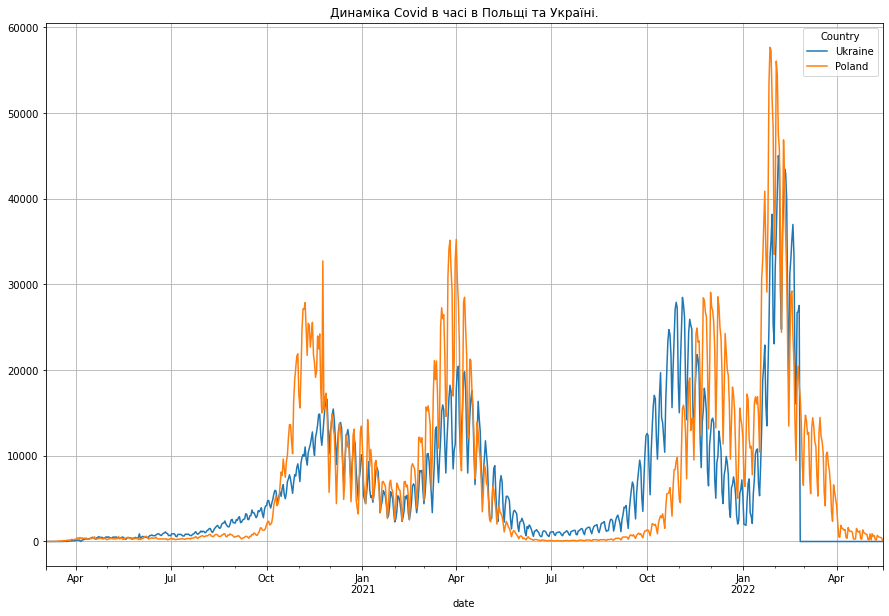

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
dataset['New Cases'][['Ukraine','Poland']].plot(ax=ax)
plt.title('Динаміка Covid в часі в Польщі та Україні.')
ax.grid()
plt.show()

Давайте проаналізуємо окремо дані про захворювання в Україні.

In [46]:
ukrDataset = dataset['New Cases']['Ukraine']
ukrDataset.describe()


count      804.000000
mean      6269.300995
std       7953.963205
min          0.000000
25%        708.250000
50%       2966.500000
75%       9191.500000
max      45022.000000
Name: Ukraine, dtype: float64

Тепер про захворювання в Польщі.

In [47]:
polDataset = dataset['New Cases']['Poland']
polDataset.describe()

count      804.000000
mean      7466.961443
std      10209.971781
min          0.000000
25%        361.000000
50%       2006.500000
75%      12110.000000
max      57659.000000
Name: Poland, dtype: float64

Тепер давайте побудуємо 2 гістограми по кількості захворювань для країн.

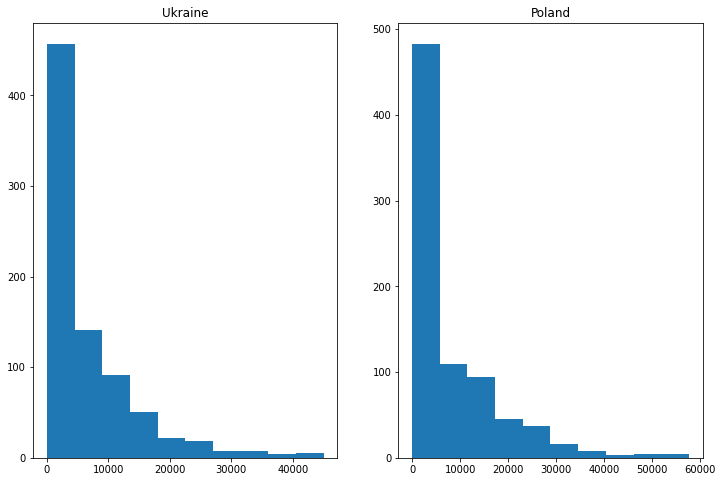

In [48]:
fig, ax = plt.subplots(1,2,figsize = (12,8))
ax[0].set_title('Ukraine')
ax[0].hist(ukrDataset)
ax[1].set_title('Poland')
ax[1].hist(polDataset)

plt.show()

Для кращої візуалізації властивостей ряду давайте застосуємо згладжування за допомогою ковзаючого середнього.

Ukraine


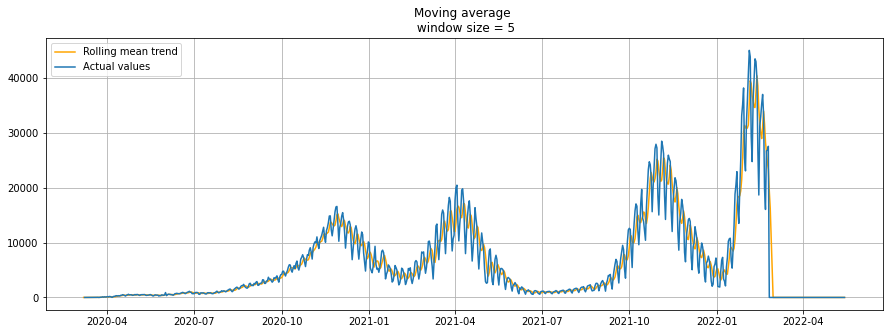

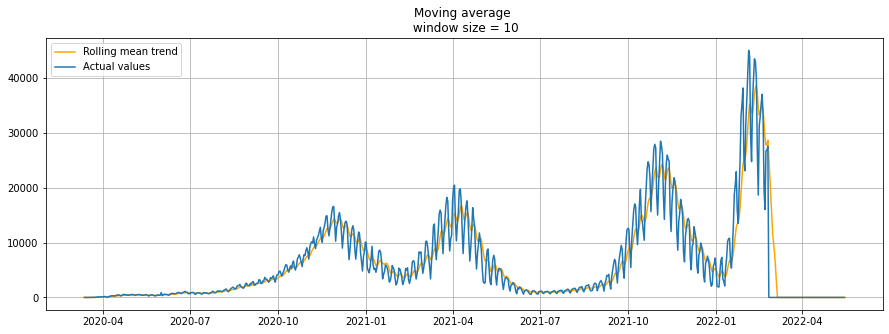

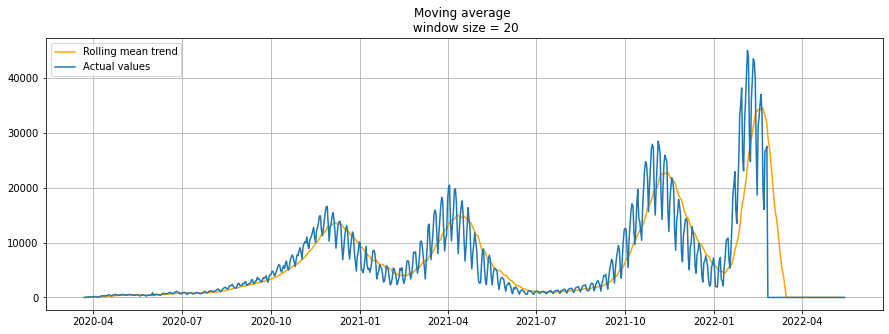

Poland


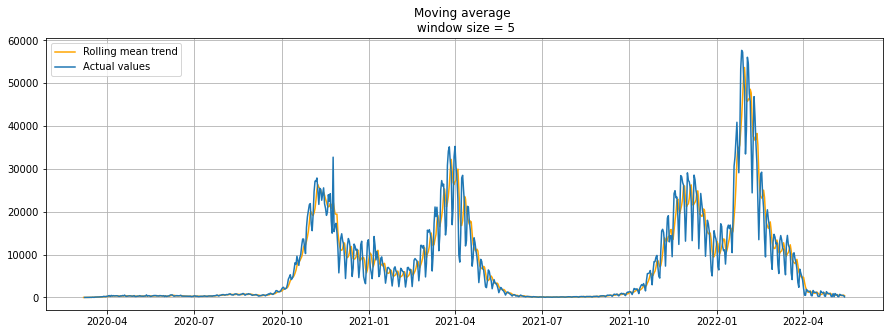

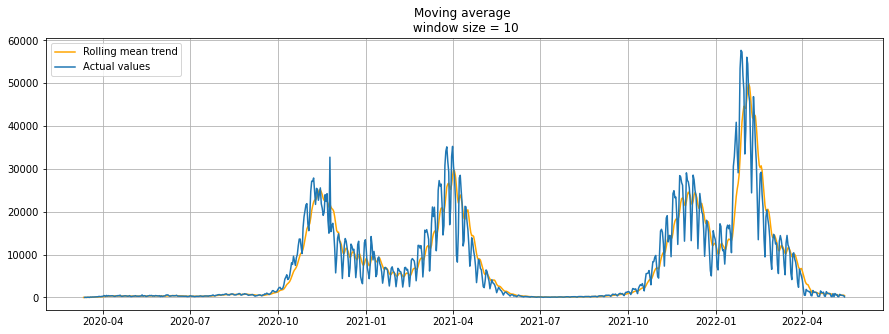

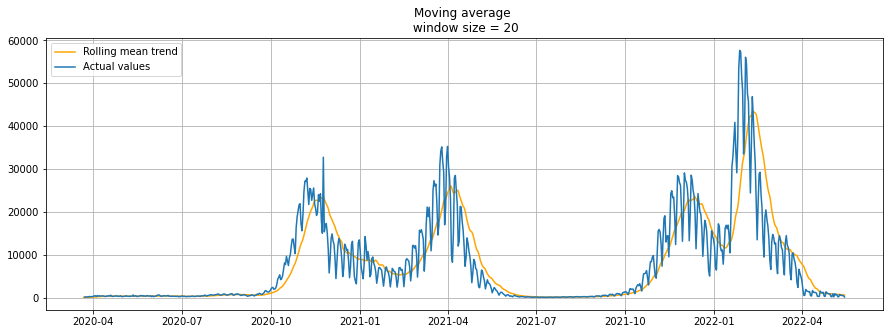

In [49]:
def plot_moving_average(series,n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title(f'Moving average \n window size = {n}')
    plt.plot(rolling_mean,c = 'orange',label = 'Rolling mean trend')
    plt.plot(series[n:],label = 'Actual values')
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.show()

print("Ukraine")
plot_moving_average(ukrDataset,5)
plot_moving_average(ukrDataset,10)
plot_moving_average(ukrDataset,20)
print("Poland")
plot_moving_average(polDataset,5)
plot_moving_average(polDataset,10)
plot_moving_average(polDataset,20)

Тепер давайте візуалізуємо декомпозицію ряду на тренд, сезонність та залишки для даних про захворювання в Україні.

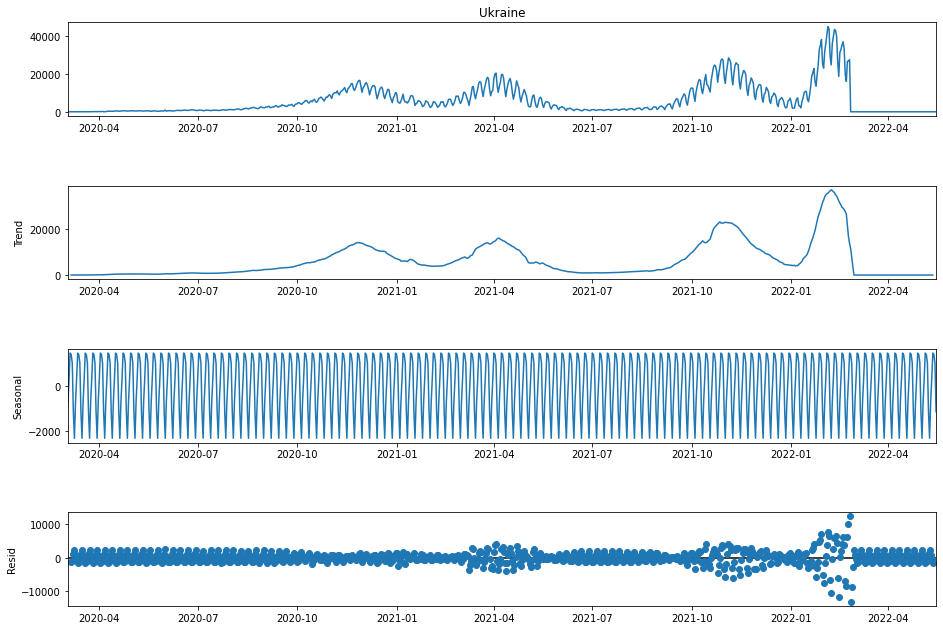

In [50]:
import statsmodels.tsa.api as smt

decomposition = smt.seasonal_decompose(ukrDataset[~ukrDataset.isna()])

fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()


Тепер для даних про захворювання в Польщі.

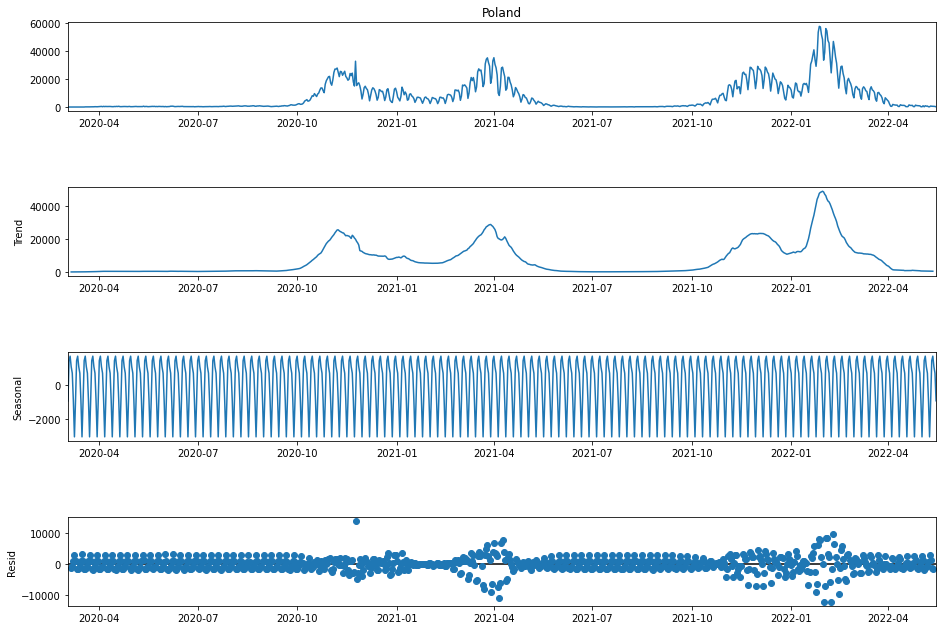

In [51]:
decomposition = smt.seasonal_decompose(polDataset[~polDataset.isna()])

fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()


Тепер давайте побудуємо графіки автокореляції та часткової автокореляції.

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


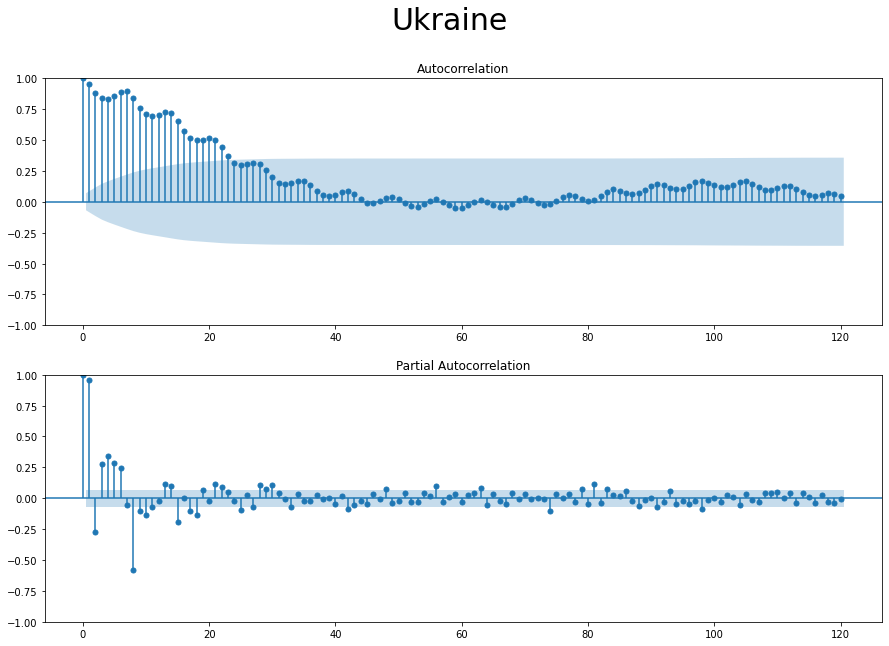

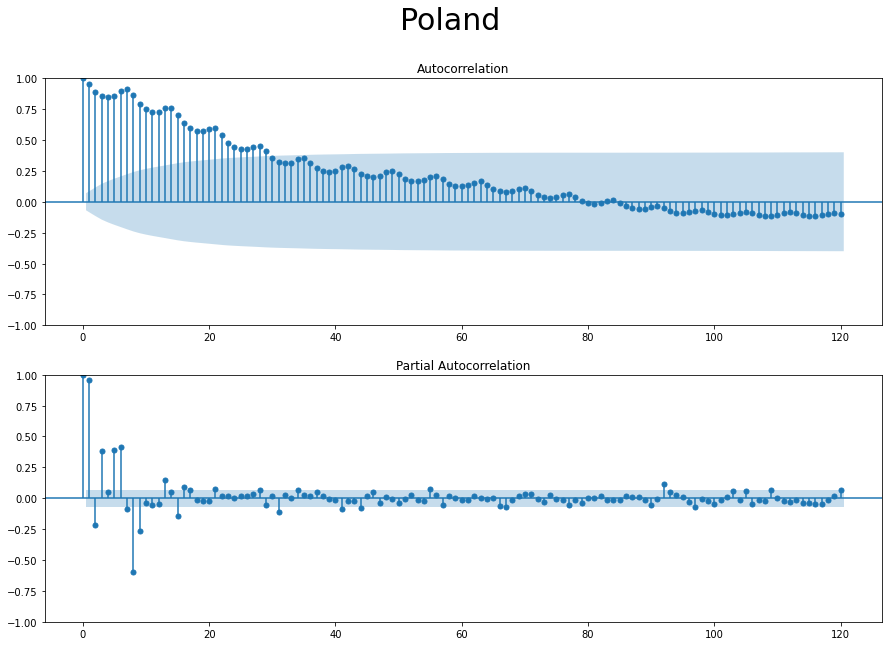

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,figsize=(15,10))
fig.suptitle('Ukraine',fontsize = 30)
ax[0] = plot_acf(ukrDataset[~ukrDataset.isna()],ax=ax[0],lags = 120)
ax[1] = plot_pacf(ukrDataset[~ukrDataset.isna()],ax=ax[1],lags = 120)

fig, ax = plt.subplots(2,figsize=(15,10))
fig.suptitle('Poland',fontsize = 30)
ax[0] = plot_acf(polDataset[~polDataset.isna()],ax=ax[0],lags = 120)
ax[1] = plot_pacf(polDataset[~polDataset.isna()],ax=ax[1],lags = 120)

Тепер перевіримо ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера.

In [53]:
def dickey_fuller_test(series):
    test = smt.adfuller(series,autolag = 'AIC')
    print('adf: ',test[0])
    print('p-value: ',test[1])
    print('Critical values: ',test[4])
    if(test[0]>test[4]['5%']):
        print('Наявні одиничні корені, ряд не стаціонарний')
    else:
        print('Одиничні корені відсутні, ряд стаціонарний.')

dickey_fuller_test(ukrDataset[~ukrDataset.isna()])
dickey_fuller_test(polDataset[~polDataset.isna()])

adf:  -3.7429715235705117
p-value:  0.0035477545948981257
Critical values:  {'1%': -3.4387398917732193, '5%': -2.8652430432199654, '10%': -2.5687418568690683}
Одиничні корені відсутні, ряд стаціонарний.
adf:  -3.31929293536957
p-value:  0.014037799680067773
Critical values:  {'1%': -3.438686413400388, '5%': -2.8652194721349424, '10%': -2.5687293001910008}
Одиничні корені відсутні, ряд стаціонарний.
